In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../evaluation.csv')

In [3]:
df

,relatorio,voto,acordao,generated,model,n_examples,temperature,bert_score_precision,bert_score_recall,bert_score_f1,meteor_score,rouge1,rouge2,rougeL
0,1. Trata o presente processo da Prestação de C...,"Em face dos dados apresentados nos autos, veri...","Vistos, relatados e discutidos os autos do pro...",**Tribunal de Contas do Estado do Acre**\r\n\r...,llama-3.1-8b-instant,0,0.25,0.703757,0.678256,0.690771,0.647883,0.667814,0.572414,0.578313
1,Tratam os autos da aposentadoria do servidor p...,Trata-se de apreciação da legalidade e registr...,"Vistos, relatados e discutidos os autos do pro...",**Tribunal de Contas do Estado do Acre**\r\n\r...,llama-3.1-8b-instant,0,0.25,0.700539,0.708395,0.704445,0.532079,0.476636,0.421546,0.453271
2,1. Tratam os autos de Denúncia protocolada na ...,O EXMO. SENHOR CONSELHEIRO ANTONIO CRISTOVÃO C...,"Vistos, relatados e discutidos os autos do pro...",**Tribunal de Contas do Estado do Acre**\r\n\r...,llama-3.1-8b-instant,0,0.25,0.646800,0.675788,0.660976,0.570724,0.383529,0.294811,0.322353
3,1. Trata-se de apreciação da legalidade e regi...,A EXMA. SENHORA CONSELHEIRA DULCINÉA BENÍCIO D...,"Vistos, relatados e discutidos os autos do pro...",**Tribunal de Contas do Estado do Acre**\r\n\r...,llama-3.1-8b-instant,0,0.25,0.687704,0.701571,0.694568,0.663503,0.565333,0.470588,0.410667
4,Tratam os autos da aposentadoria da servidora ...,Trata-se de apreciação da legalidade e registr...,"Vistos, relatados e discutidos os autos do pro...",**Tribunal de Contas do Estado do Acre**\r\n\r...,llama-3.1-8b-instant,0,0.25,0.735396,0.751823,0.743519,0.807132,0.635682,0.580451,0.608696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3578,1. Tratam os autos da Prestação de Contas do F...,A EXMA. SENHORA CONSELHEIRA DULCINÉA BENÍCIO D...,"Vistos, relatados e discutidos os autos do pro...","Sim, posso ajudar a resumir os principais pont...",llama3.1,5,1.00,0.822490,0.725276,0.770830,0.560845,0.720461,0.597101,0.657061
3579,1. Tratam os autos de aposentadoria voluntária...,A EXMA. SENHORA CONSELHEIRA NALUH MARIA LIMA G...,"Vistos, relatados e discutidos os autos do pro...",Não foi possível encontrar informações sobre a...,llama3.1,5,1.00,0.735092,0.611263,0.667483,0.115625,0.303951,0.152905,0.151976
3580,Trata o presente processo de aposentadoria vol...,O EXMO. SENHOR CONSELHEIRO VALMIR GOMES RIBEIR...,"Vistos, relatados e discutidos os autos do pro...",**ACORDÃO Nº XXX**\r\n\r\n**Tribunal de Contas...,llama3.1,5,1.00,0.685725,0.735331,0.709662,0.536667,0.454545,0.292453,0.304075
3581,1. Trata o presente processo da aposentadoria ...,O EXMO. SENHOR CONSELHEIRO ANTONIO CRISTOVÃO C...,"Vistos, relatados e discutidos os autos do pro...",A decisão proferida pela Corte de Contas do Ac...,llama3.1,5,1.00,0.780624,0.716103,0.746973,0.371236,0.559259,0.427509,0.437037


In [4]:
df.columns

Index(['relatorio', 'voto', 'acordao', 'generated', 'model', 'n_examples',
       'temperature', 'bert_score_precision', 'bert_score_recall',
       'bert_score_f1', 'meteor_score', 'rouge1', 'rouge2', 'rougeL'],
      dtype='object')

In [5]:
summary = df.drop(['relatorio', 'voto', 'acordao', 'generated', 'model'], axis=1).groupby(['temperature', 'n_examples']).agg(['min', 'mean', 'max', 'median', 'std'])

In [6]:
summary.columns

MultiIndex([('bert_score_precision',    'min'),
            ('bert_score_precision',   'mean'),
            ('bert_score_precision',    'max'),
            ('bert_score_precision', 'median'),
            ('bert_score_precision',    'std'),
            (   'bert_score_recall',    'min'),
            (   'bert_score_recall',   'mean'),
            (   'bert_score_recall',    'max'),
            (   'bert_score_recall', 'median'),
            (   'bert_score_recall',    'std'),
            (       'bert_score_f1',    'min'),
            (       'bert_score_f1',   'mean'),
            (       'bert_score_f1',    'max'),
            (       'bert_score_f1', 'median'),
            (       'bert_score_f1',    'std'),
            (        'meteor_score',    'min'),
            (        'meteor_score',   'mean'),
            (        'meteor_score',    'max'),
            (        'meteor_score', 'median'),
            (        'meteor_score',    'std'),
            (              'rouge1',    

<Figure size 1000x600 with 0 Axes>

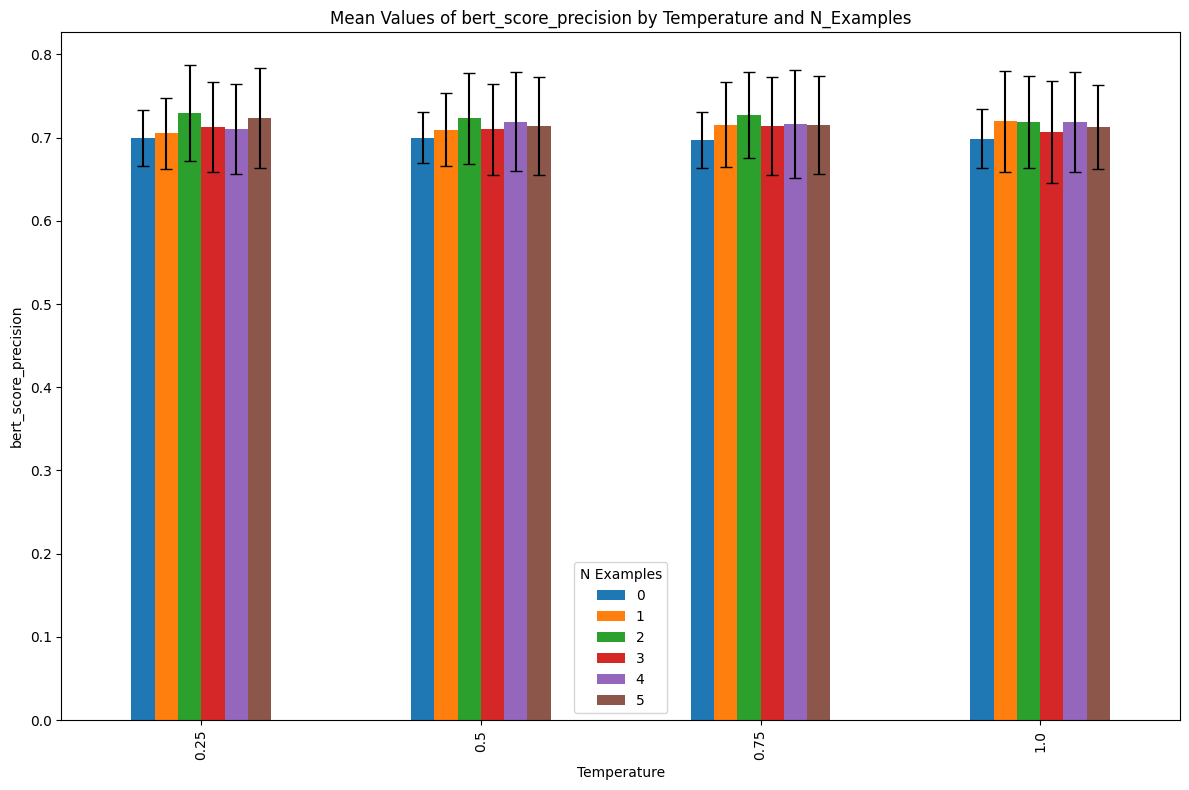

<Figure size 1000x600 with 0 Axes>

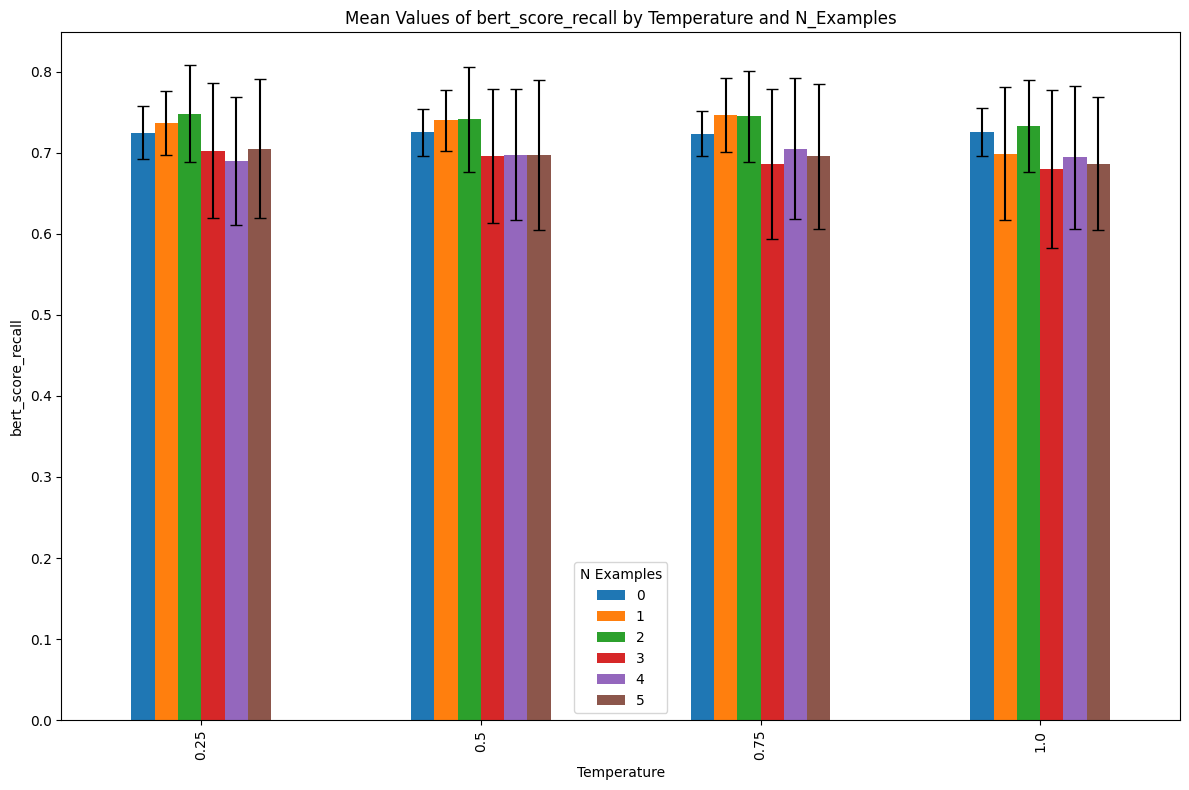

<Figure size 1000x600 with 0 Axes>

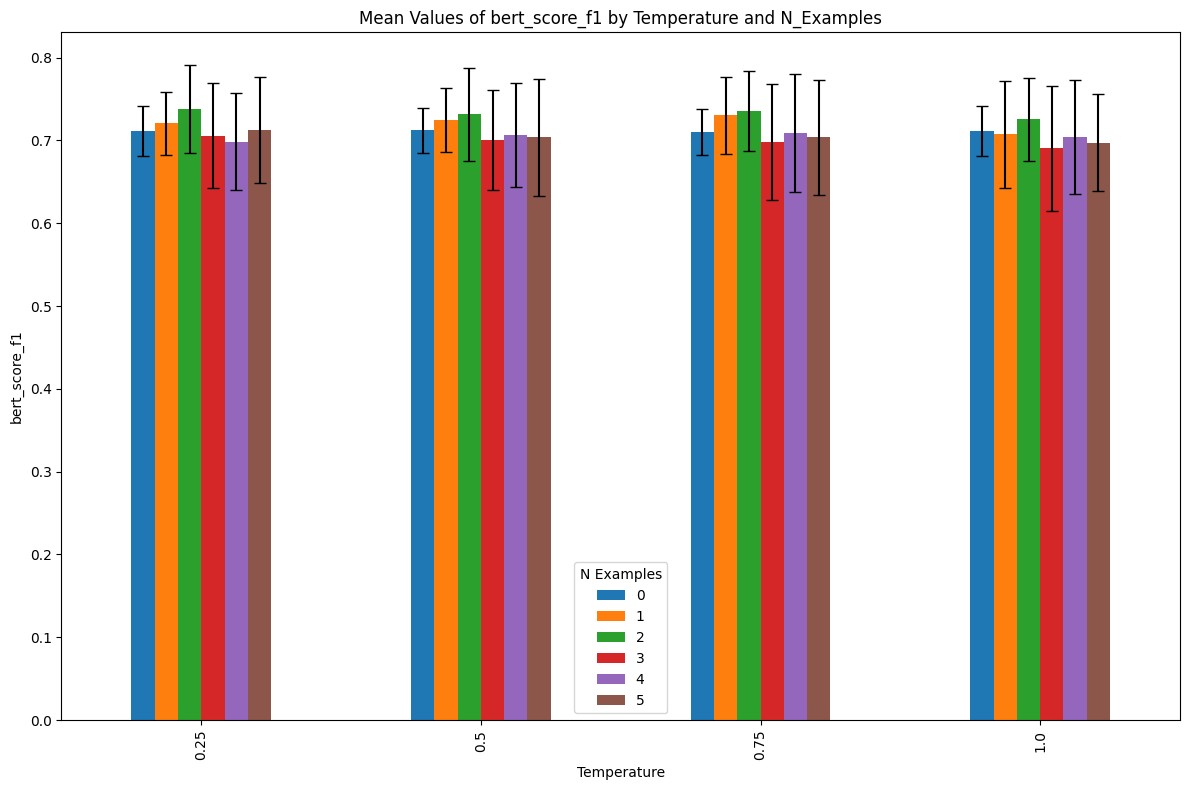

<Figure size 1000x600 with 0 Axes>

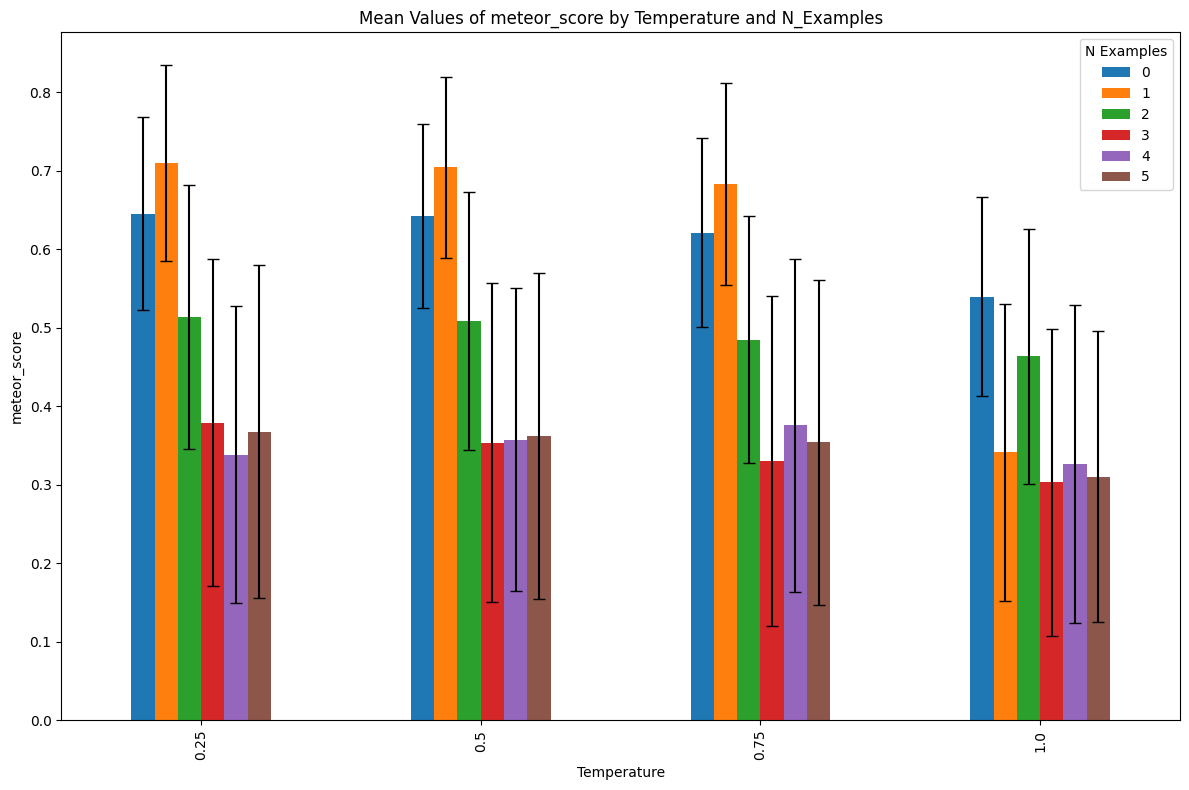

<Figure size 1000x600 with 0 Axes>

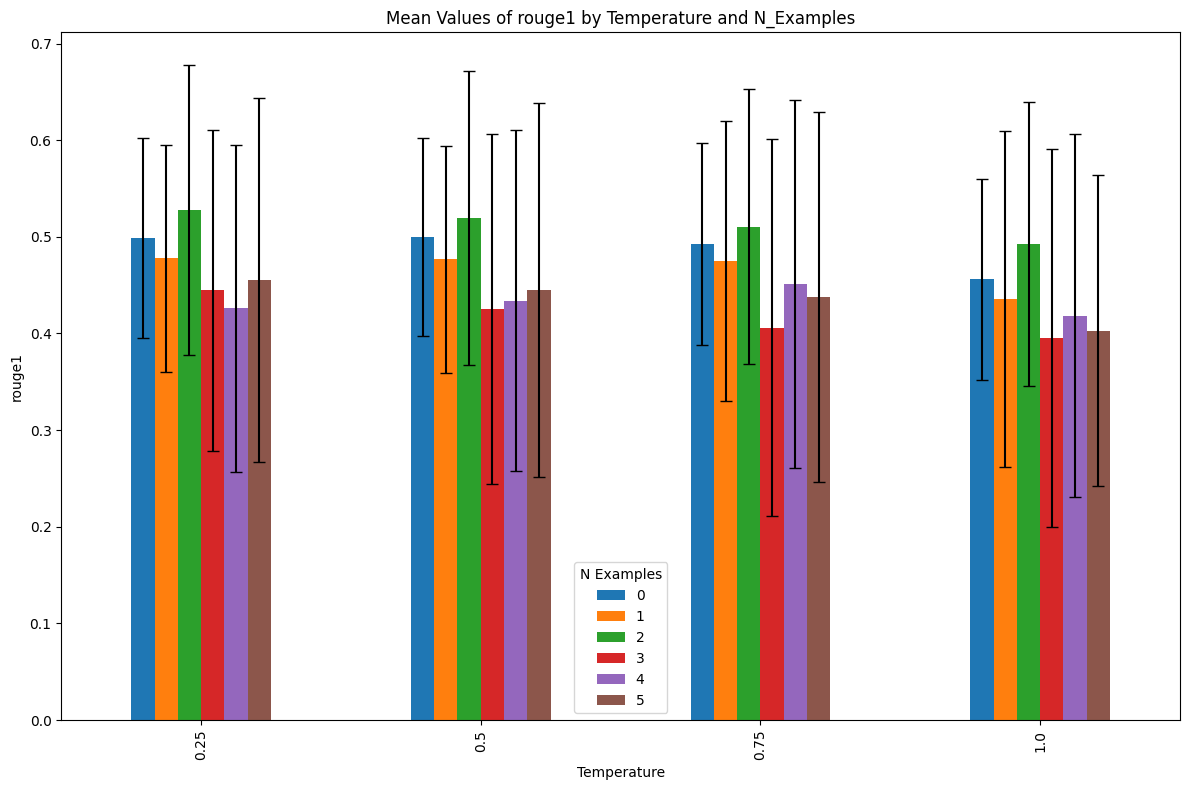

<Figure size 1000x600 with 0 Axes>

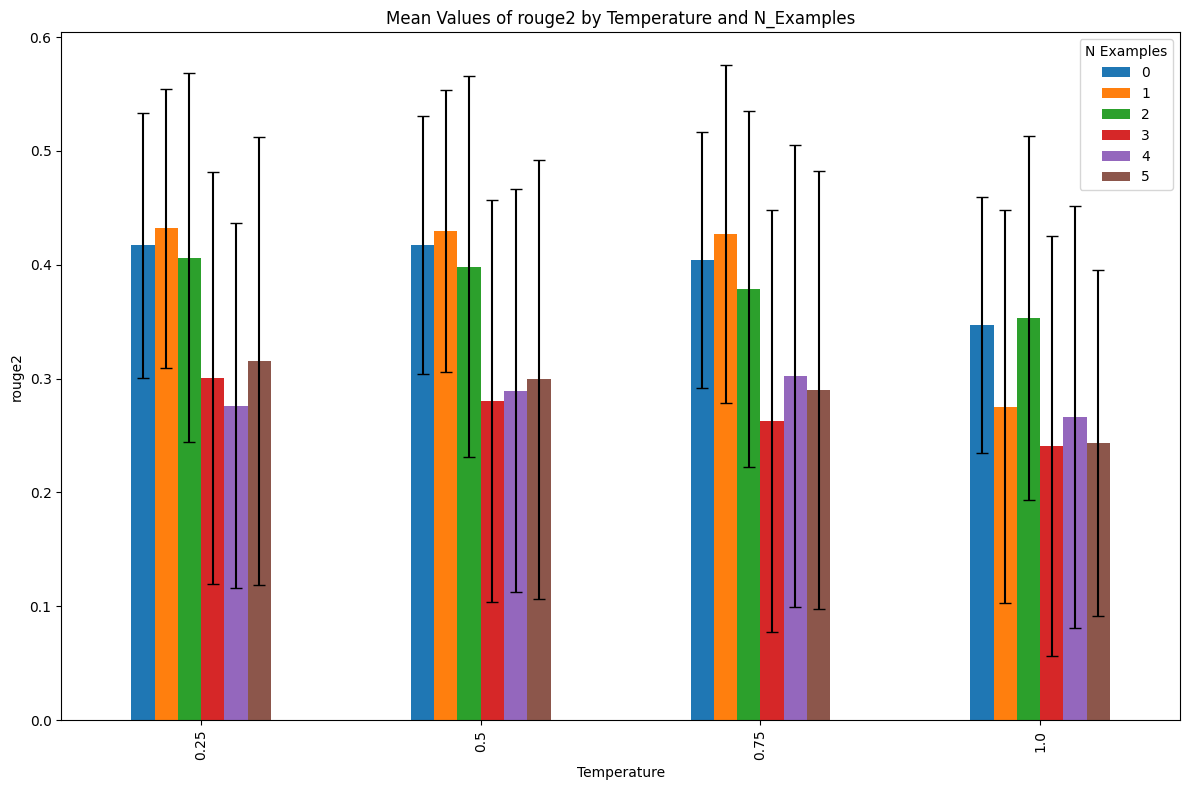

<Figure size 1000x600 with 0 Axes>

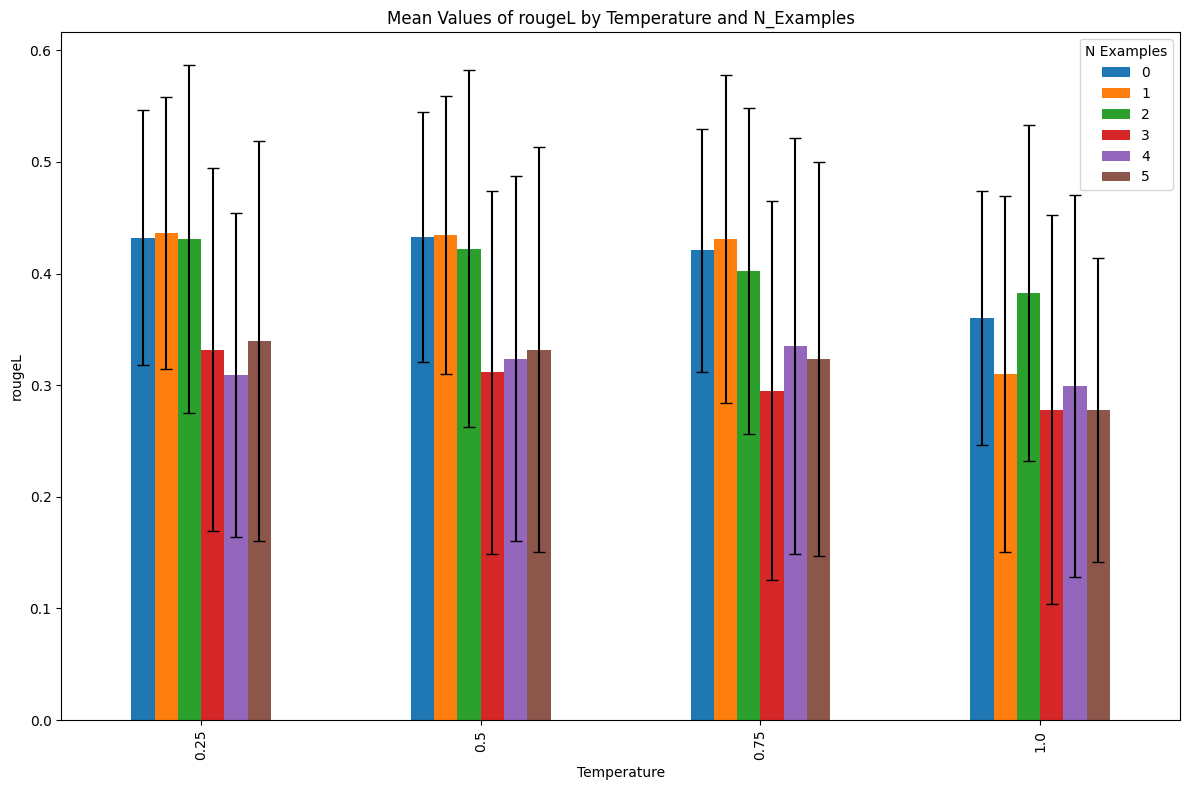

In [7]:
import matplotlib.pyplot as plt

for metric in df.drop(['relatorio', 'voto', 'acordao', 'generated', 'model', 'n_examples', 'temperature'], axis=1).columns:
    means = summary[(metric, 'mean')].unstack()
    std_devs = summary[(metric, 'std')].unstack()

    plt.figure(figsize=(10, 6))
    means.plot(kind='bar', yerr=std_devs, capsize=4, figsize=(12, 8))
    plt.title(f'Mean Values of {metric} by Temperature and N_Examples')
    plt.ylabel(metric)
    plt.xlabel('Temperature')
    plt.legend(title="N Examples")
    plt.tight_layout()
    plt.show()

In [9]:
df.drop(['relatorio', 'voto', 'acordao', 'generated', 'model', 'n_examples', 'temperature'], axis=1).columns

Index(['bert_score_precision', 'bert_score_recall', 'bert_score_f1',
       'bleu_score', 'meteor_score', 'rouge1', 'rouge2', 'rougeL'],
      dtype='object')

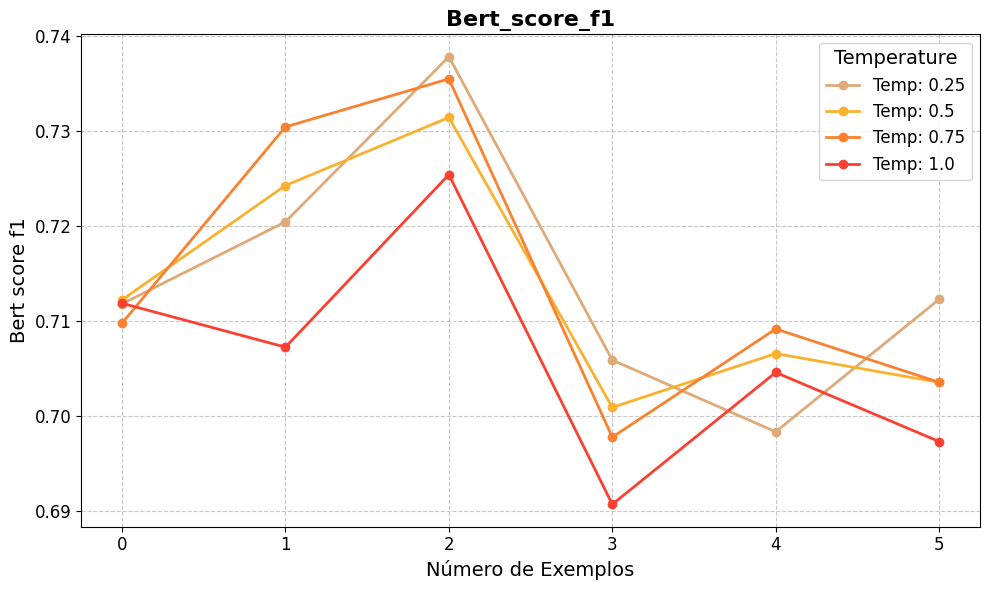

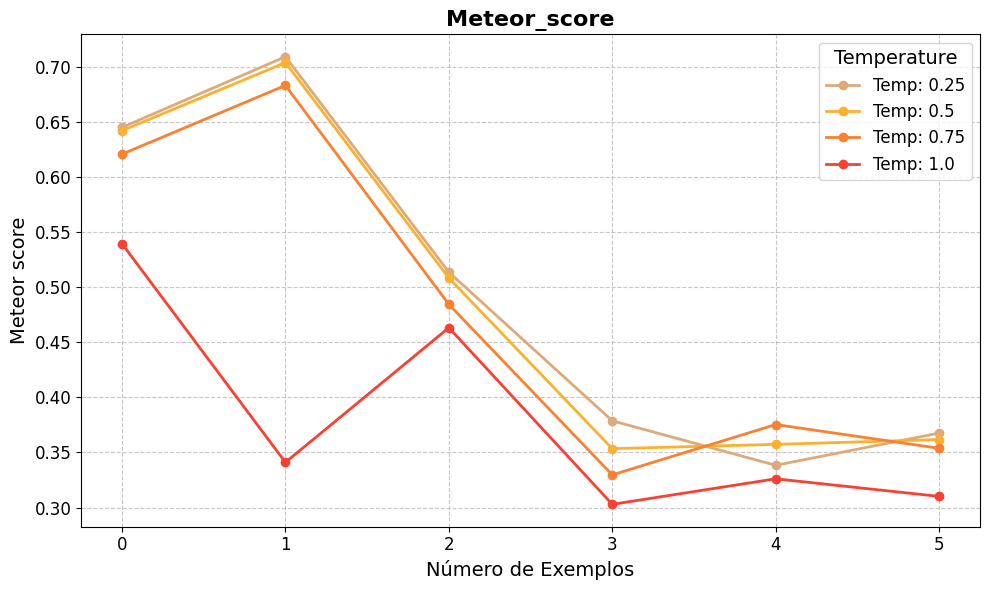

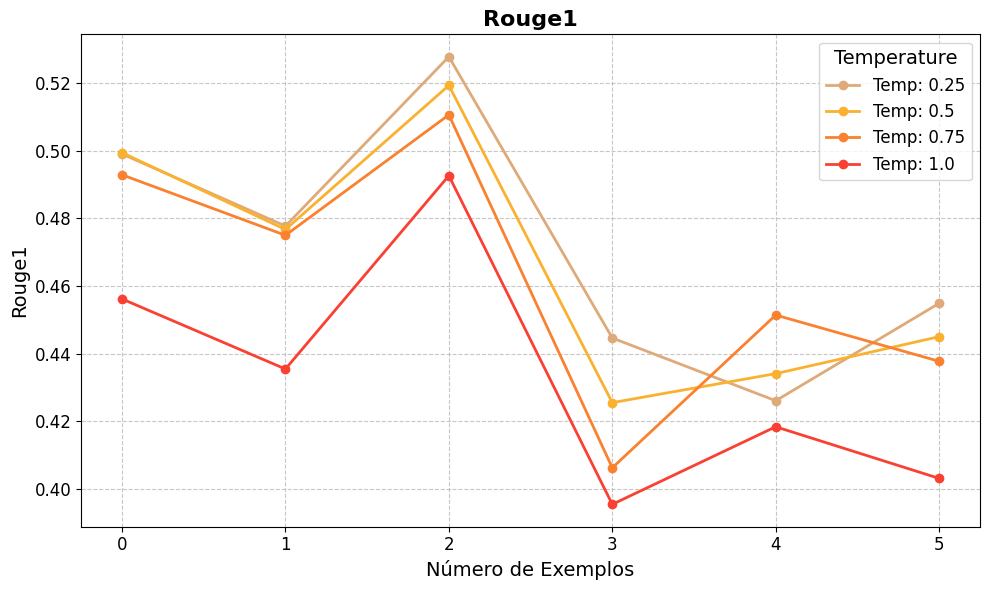

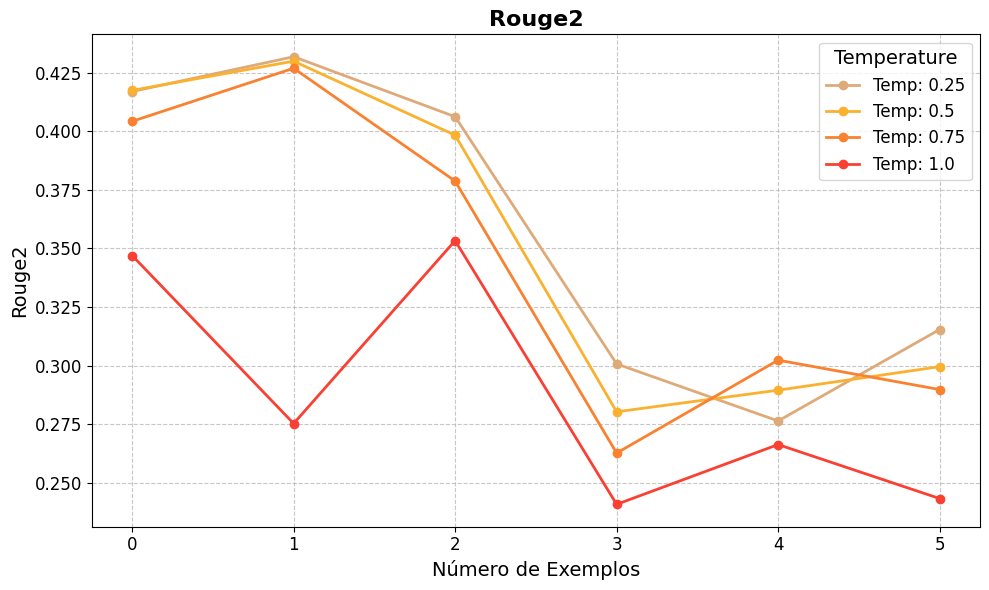

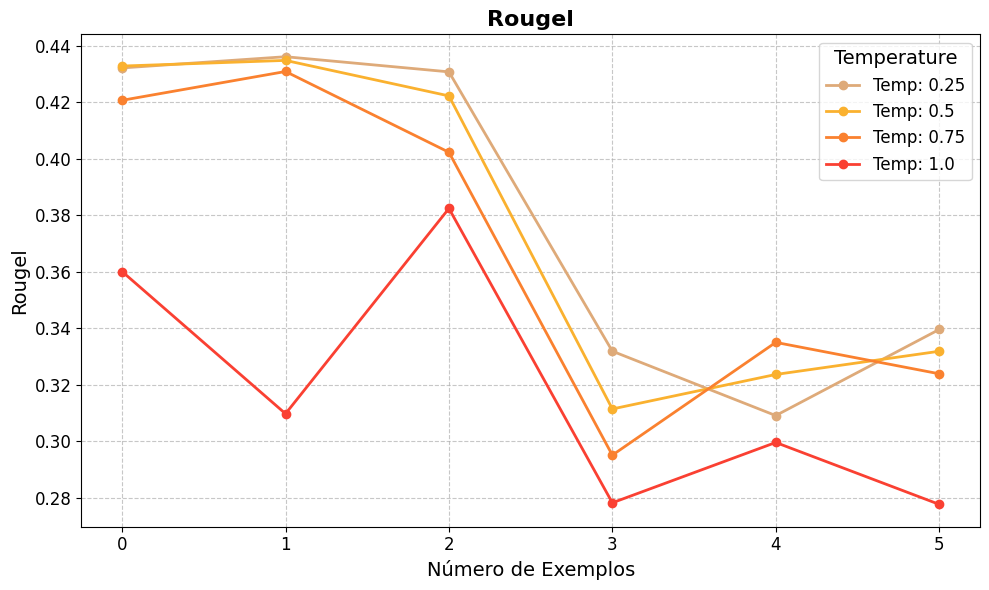

In [8]:
metrics = ['bert_score_f1', 'meteor_score', 'rouge1', 'rouge2', 'rougeL']
group = df.drop(['relatorio', 'voto', 'acordao', 'generated', 'model'], axis=1).groupby(
        ['temperature', 'n_examples']
    ).mean().reset_index()

colors = ['#DEAA79', '#FAB12F', '#FA812F', '#FA4032']  # Verde, laranja, azul, vermelho, roxo
color_map = {temp: color for temp, color in zip(sorted(group['temperature'].unique()), colors)}

for metric in metrics:
    plt.figure(figsize=(10, 6))
    for temp in group['temperature'].unique():
        subset = group[group['temperature'] == temp]
        plt.plot(subset['n_examples'], subset[metric], marker='o', linestyle='-', linewidth=2, label=f"Temp: {temp}", color=color_map[temp])

    plt.title(f'{metric.capitalize()}', fontsize=16, fontweight='bold')
    plt.xlabel('Número de Exemplos', fontsize=14)
    plt.ylabel(metric.replace('_', ' ').capitalize(), fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Temperature', fontsize=12, title_fontsize=14)
    plt.grid(visible=True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()